In [3]:
from folktables import ACSDataSource, ACSHealthInsurance
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import os 
from glob import glob
import matplotlib as mpl 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import permutation_test
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from methods import * 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
              'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
              'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
              'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']


(array([31514.,  9040., 15555., 16207., 12843., 26737., 64410., 77449.,
        86355., 38707.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

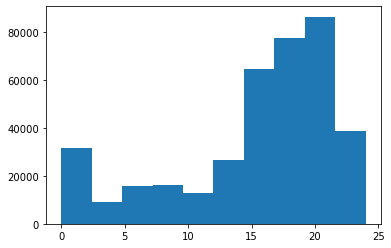

In [39]:
plt.hist(features[:,1])

In [96]:
data_source = ACSDataSource(survey_year=2018, horizon='1-Year', survey='person')
# acs_data = data_source.get_data(states=["RI"], download=True)
# features, labels, group = ACSHealthInsurance.df_to_numpy(acs_data)


# for state in state_list: 
#     acs_data = data_source.get_data(states=[state], download=True)
#     features, labels, group = ACSHealthInsurance.df_to_numpy(acs_data)
#     y1 = model.predict(features[(features[:,1] < 18 )*(labels == 1)])
#     y2 = model.predict(features[(features[:,1] > 21)*(labels == 1)])
#     if np.abs(np.mean(y1) - np.mean(y2)) >= 0.1: 
#         print(state)
#         break 
#     y1 = model.predict(features[(features[:,1] < 18)])
#     y2 = model.predict(features[(features[:,1] > 21)])
#     if np.abs(np.mean(y1) - np.mean(y2)) >= 0.1: 
#         print(state)
#         break 

RI


In [97]:
acs_data = data_source.get_data(states=["RI"], download=True)
features, labels, group = ACSHealthInsurance.df_to_numpy(acs_data)


In [85]:
model = RandomForestClassifier()
np.random.seed(42)
inds = np.random.choice(features.shape[0], 2000, replace=False)
model.fit(features[inds,:], labels[inds])

RandomForestClassifier()

In [98]:
y1 = model.predict(features[(features[:,1] < 10)*(labels == 1)])
y2 = model.predict(features[(features[:,1] > 21)*(labels == 1)])

In [100]:
len(y1), len(y2)

(149, 269)

In [99]:
np.mean(y1), np.mean(y2)

(0.026845637583892617, 0.1449814126394052)